#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import files
import io

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Read Data & Prepare Data

##Data Reading

In [2]:
Uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data (1).csv


In [3]:
Data = pd.read_csv(io.StringIO(Uploaded['Salary_Data.csv'].decode('utf-8')))
Data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


##Data Exploration

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
Data['Salary'] = Data['Salary'].astype(int)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


[]

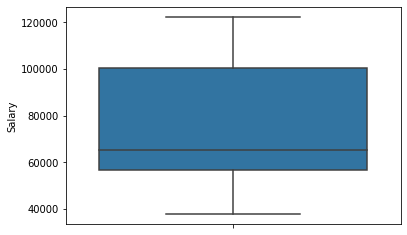

In [7]:
sns.boxplot(y=Data['Salary'])
plt.plot()

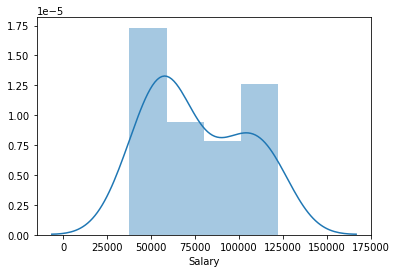

In [8]:
sns.distplot(Data['Salary'])
plt.show()

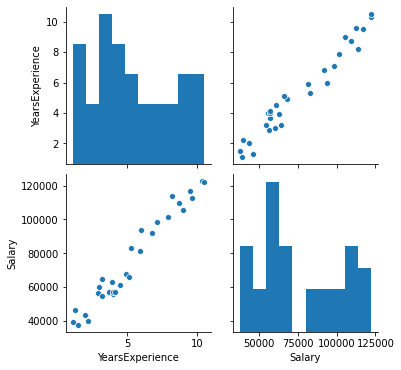

In [9]:
sns.pairplot(Data)
plt.show()

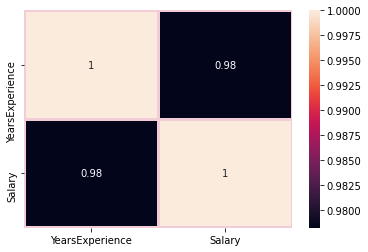

In [10]:
sns.heatmap(Data.corr(),
            annot=True,
            linewidth=2,
            linecolor='#f2cdd7')
plt.show()

##Data Transformation to be Numpy Array


In [11]:
X = np.array(Data['YearsExperience']).reshape(-1, 1)
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [12]:
X.shape

(30, 1)

In [13]:
type(X)

numpy.ndarray

In [14]:
Y = np.array(Data['Salary']).reshape(-1, 1)
Y

array([[ 39343],
       [ 46205],
       [ 37731],
       [ 43525],
       [ 39891],
       [ 56642],
       [ 60150],
       [ 54445],
       [ 64445],
       [ 57189],
       [ 63218],
       [ 55794],
       [ 56957],
       [ 57081],
       [ 61111],
       [ 67938],
       [ 66029],
       [ 83088],
       [ 81363],
       [ 93940],
       [ 91738],
       [ 98273],
       [101302],
       [113812],
       [109431],
       [105582],
       [116969],
       [112635],
       [122391],
       [121872]])

In [15]:
Y.shape

(30, 1)

In [16]:
type(Y)

numpy.ndarray

##Data Scaling (Generalization)
ใช้การ Normalization แบบ Standardization แต่ใช่ Function ของ Scikit Learn

In [0]:
sc_X = StandardScaler()
sc_Y = StandardScaler()

X_Train = sc_X.fit_transform(X)
Y_Train = sc_Y.fit_transform(Y)

#Modeling

##Linear Kernel

In [18]:
RegressorLinear = SVR(kernel='linear')
RegressorLinear.fit(X_Train, Y_Train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

##Radial Basis Function Kernel

In [19]:
RegressorRBF = SVR(kernel='rbf')
RegressorRBF.fit(X_Train, Y_Train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#Prediction

##Linear Kernel

In [20]:
YEx = float(input('Plz enter your working experiences in years: '))

#Scaling ค่า X
X_Test = sc_X.transform(np.array(YEx).reshape(-1, 1))
ResultLinear = RegressorLinear.predict(X_Test)

#Re-Scaling ค่า Y
PredictedSalary = sc_Y.inverse_transform(ResultLinear)
print(f'As your {YEx} years working experiences, your salary should be approximately {round(PredictedSalary[0], 2)} USD')

Plz enter your working experiences in years: 6.8
As your 6.8 years working experiences, your salary should be approximately 89322.42 USD


#Radial Basis Function Kernel

In [21]:
YEx = float(input('Plz enter your working experiences in years: '))

#Scaling ค่า X
X_Test = sc_X.transform(np.array(YEx).reshape(-1, 1))
ResultRBF = RegressorRBF.predict(X_Test)

#Re-Scaling ค่า Y
PredictedSalary = sc_Y.inverse_transform(ResultRBF)
print(f'As your {YEx} years working experiences, your salary should be approximately {round(PredictedSalary[0], 2)} USD per year')

Plz enter your working experiences in years: 6.8
As your 6.8 years working experiences, your salary should be approximately 93595.17 USD per year


##Error Function

In [22]:
def Error(Actual, Predict):
  E = np.abs(((Predict-Actual)/Actual)*100)
  print(f'There is approximately {round(E, 2)} % error.')

Actual = float(input('Actual Salary: '))
Predict = float(input('Predicted Salary: '))
Error(Actual, Predict)

Actual Salary: 91738
Predicted Salary: 93595.17
There is approximately 2.02 % error.


#Group Prediction

In [23]:
GroupPredict = sc_Y.inverse_transform(RegressorRBF.predict(X_Train))
GroupPredict

array([ 43296.16442868,  43502.718266  ,  43998.28879802,  46225.11502223,
        47386.68192568,  51916.02026083,  52580.73860814,  53915.0561013 ,
        53915.0561013 ,  57368.10532126,  58863.00698958,  59650.28593501,
        59650.28593501,  60469.29008332,  64127.60010341,  68487.23942334,
        70928.37326913,  73518.24037208,  81811.19849278,  83210.33288804,
        93595.16637346,  96888.85481804, 104003.6946568 , 106238.13870622,
       109727.58008953, 111727.14783308, 114787.37007368, 115328.28632694,
       117879.97587636, 118069.6713812 ])

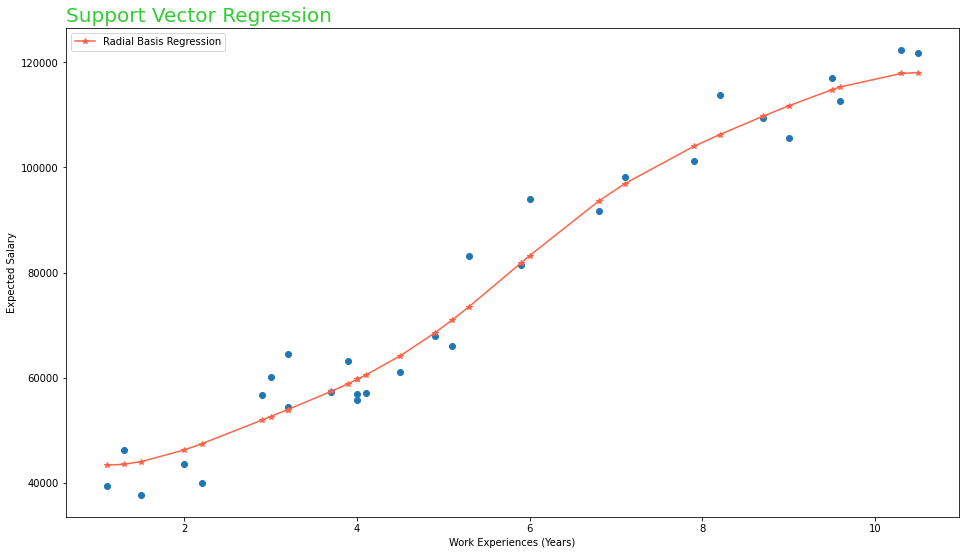

In [24]:
plt.figure(figsize=(16, 9))
plt.scatter(X, Y)
plt.plot(X, GroupPredict,
         color='#ff6347',
         marker='*',
         label='Radial Basis Regression')
plt.title('Support Vector Regression',
          loc='left',
          fontsize=20,
          color='#32cd32')
plt.xlabel('Work Experiences (Years)')
plt.ylabel('Expected Salary')
plt.legend()
plt.show()